## 任务说明

- 任务主题：论文作者统计，统计所有论文作者出现评率Top10的姓名；
- 任务内容：论文作者的统计、使用 **Pandas** 读取数据并使用字符串操作；
- 任务成果：学习 **Pandas** 的字符串操作；

## 数据处理步骤

在原始arxiv数据集中论文作者`authors`字段是一个字符串格式，其中每个作者使用逗号进行分隔分，所以我们我们首先需要完成以下步骤：

- 使用逗号对作者进行切分；
- 剔除单个作者中非常规的字符；

具体操作可以参考以下例子：

```
C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan

# 切分为，其中\\为转义符

C. Ba'lazs
E. L. Berger
P. M. Nadolsky
C.-P. Yuan
```

当然在原始数据集中`authors_parsed`字段已经帮我们处理好了作者信息，可以直接使用该字段完成后续统计。

## 字符串处理

在Python中字符串是最常用的数据类型，可以使用引号('或")来创建字符串。Python中所有的字符都使用字符串存储，可以使用方括号来截取字符串，如下实例：

In [1]:
var1 = 'Hello Datawhale!'
var2 = "Python Everwhere!"
 
print("var1[-10:]: ", var1[-10:])
print("var2[1:5]: ", var2[0:7])

var1[-10:]:  Datawhale!
var2[1:5]:  Python 


同时在Python中还支持转义符：

| \(在行尾时) | 续行符     |
| ----------- | ---------- |
| \\          | 反斜杠符号 |
| \'          | 单引号     |
| \"          | 双引号     |
| \n          | 换行       |
| \t          | 横向制表符 |
| \r          | 回车       |

Python中还内置了很多内置函数，非常方便使用：

| **方法**            | **描述**                                                     |
| :------------------ | :----------------------------------------------------------- |
| string.capitalize() | 把字符串的第一个字符大写                                     |
| string.isalpha()    | 如果 string 至少有一个字符并且所有字符都是字母则返回 True,否则返回 False |
| string.title()      | 返回"标题化"的 string,就是说所有单词都是以大写开始，其余字母均为小写(见 istitle()) |
| string.upper()      | 转换 string 中的小写字母为大写                               |


## 具体代码实现以及讲解

### 数据读取

In [2]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [3]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors', 'categories', 'authors_parsed'],
                    100000)


为了方便处理数据，我们只选择了三个字段进行读取。

### 数据统计

接下来我们将完成以下统计操作：

- 统计所有作者姓名出现频率的Top10；
- 统计所有作者姓（姓名最后一个单词）的出现频率的Top10；
- 统计所有作者姓第一个字符的评率；

为了节约计算时间，下面选择部分类别下的论文进行处理：

In [4]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])

处理完成后`all_authors`变成了所有一个list，其中每个元素为一个作者的姓名。我们首先来完成姓名频率的统计。

Text(0.5, 0, 'Count')

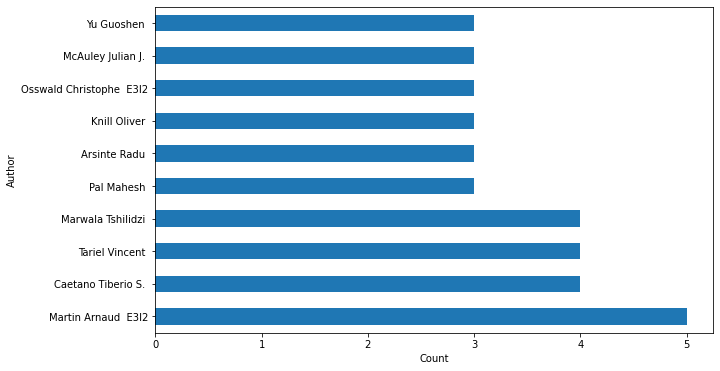

In [5]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

接下来统计姓名姓，也就是`authors_parsed`字段中作者第一个单词：

Text(0.5, 0, 'Count')

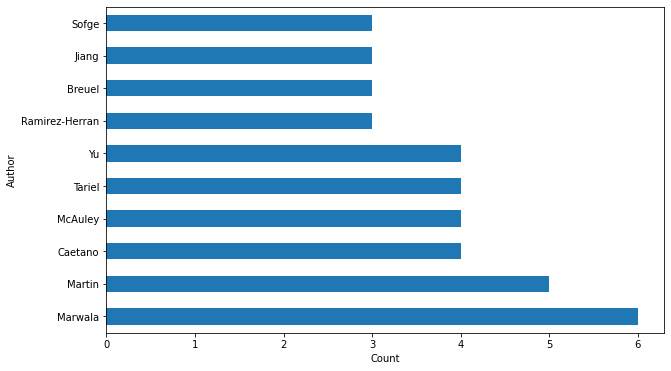

In [6]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

绘制得到的结果，从结果看出这些都是华人或者中国姓氏~


统计所有作者姓第一个字符的评率，这个流程与上述的类似，同学们可以自行尝试。
